In [27]:
%reload_ext autoreload
%autoreload 2

from sklearn.naive_bayes import ComplementNB, CategoricalNB, MultinomialNB, BernoulliNB, GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import pandas as pd
from main import *

In [28]:
trial_time_spans = {
    # "1 second": [7, 8],
    # "2 seconds": [7, 9],
    # "4 seconds": [7, 11],
    # "6 seconds": [7, 13],
    "8 seconds": [7, 15],
    # "10 seconds": [5, 15],
    # "12 seconds": [3, 15],
    # "15 seconds": [0, 15],
}

classifiers = {
    # 'ComplementNB': ComplementNB(),
    # 'CategoricalNB': CategoricalNB(),
    # 'MultinomialNB': MultinomialNB(),
    # 'GaussianNB': GaussianNB(),

    # 'BernoulliNB': BernoulliNB(),
    # 'XGBClassifier': XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.1, objective='binary:logistic'),
    # 'AdaBoostClassifier': AdaBoostClassifier(algorithm="SAMME", learning_rate=0.1, n_estimators=200),
    # 'MLP': MLPClassifier(),
    'RF': RandomForestClassifier(n_estimators=300),
    # 'KNN': KNeighborsClassifier(n_neighbors=3),
    # 'LDA': LinearDiscriminantAnalysis(solver='svd'),
    # 'SVC_poly': SVC(kernel="poly", degree=3),
    # 'SVC_linear': SVC(kernel="linear"),
    # 'SVC_sigmoid': SVC(kernel="sigmoid"),
    # 'SVC_rbf': SVC(kernel="rbf"),
    # 'GradientBoostingClassifier': GradientBoostingClassifier(),
    # 'LGBMClassifier': LGBMClassifier(),
}

def get_data(trial_time_span):
    trials, y = get_trials_and_labels(trial_kwargs={'crop_start_end': trial_time_span})

    x = [[v for k, v in i.features.items() if '' in k] for i in trials]
    x = np.array(x)

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    ros = RandomOverSampler(random_state=0)
    x, y = ros.fit_resample(x, y)

    x, y = shuffle(x, y, random_state=0) or exit(1)

    print("Number of features:", x.shape[1])

    return x, y


def get_accuracies():
    accuracies = {k: [] for k in classifiers}

    for i in range(2):
        for classifier_name, classifier in classifiers.items():
            print(f"Classifier: {classifier_name}")

            cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
            score = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
            accuracies[classifier_name].extend(score)

    print(*sorted([f"{k}, {round(np.mean(v), 3)}" for k, v in accuracies.items()]), sep="\n")

    # Total mean
    print("Total mean:", round(np.mean([np.mean(v) for v in accuracies.values()]), 3))

    return accuracies

In [29]:
duration_accs = []

for trial_time_span_name, trial_time_span in trial_time_spans.items():
    print(f"Trial time span: {trial_time_span_name}")

    x, y = get_data(trial_time_span)
    accuracies = get_accuracies()

    duration_accs.append([np.mean(v) for v in accuracies.values()])

dur_acc_df = pd.DataFrame(duration_accs, columns=classifiers.keys(), index=trial_time_spans.keys())

Trial time span: 8 seconds
Getting epochs for filename data/dasps_raw_mat/S01.mat
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Getting epochs for filename data/dasps_raw_mat/S01.mat
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Getting epochs for filename data/dasps_raw_mat/S02.mat
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Getting epochs for filename data/dasps_raw_mat/S02.mat
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Getting epochs for filename data/dasps_raw_mat/S02.mat
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Getting epochs for filename data/dasps_raw_mat/S02.mat
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Getting epoch

/Users/jakubblaha/Documents/thesis/thesis-python/main.py:46: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:46: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:46: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:46: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:46: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:46: RuntimeWarning: tmax is not in time interval. tmax is set to <cl

[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:46: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:46: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:46: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (14.9922 s)
  
/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
[ 4  8 10 13 30 45]
(6,)
[ 4  8 10 13 30 45]
(6,)
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


/Users/jakubblaha/Documents/thesis/thesis-python/main.py:121: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 7 – 14.992 s (baseline off), ~127 kB, data loaded,
 '1': 1>, so metadata was not modified.
  


[Connectivity computation done]
Number of features: 812
Classifier: RF
RF, 0.783
Total mean: 0.783


In [30]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 10, 'display.width', 1000):
    print(dur_acc_df.T)

    8 seconds
RF   0.783328


In [31]:
# Mean accuracy for each classifier
print(dur_acc_df.mean(axis=0).sort_values(ascending=False))

RF    0.783328
dtype: float64


In [32]:
# Print 12 seconds time span accuracies
print(dur_acc_df.loc["10 seconds"].sort_values(ascending=False))

KeyError: '10 seconds'

In [ ]:
print(dur_acc_df.mean(axis=1).sort_values(ascending=False))

10 seconds    0.705105
dtype: float64


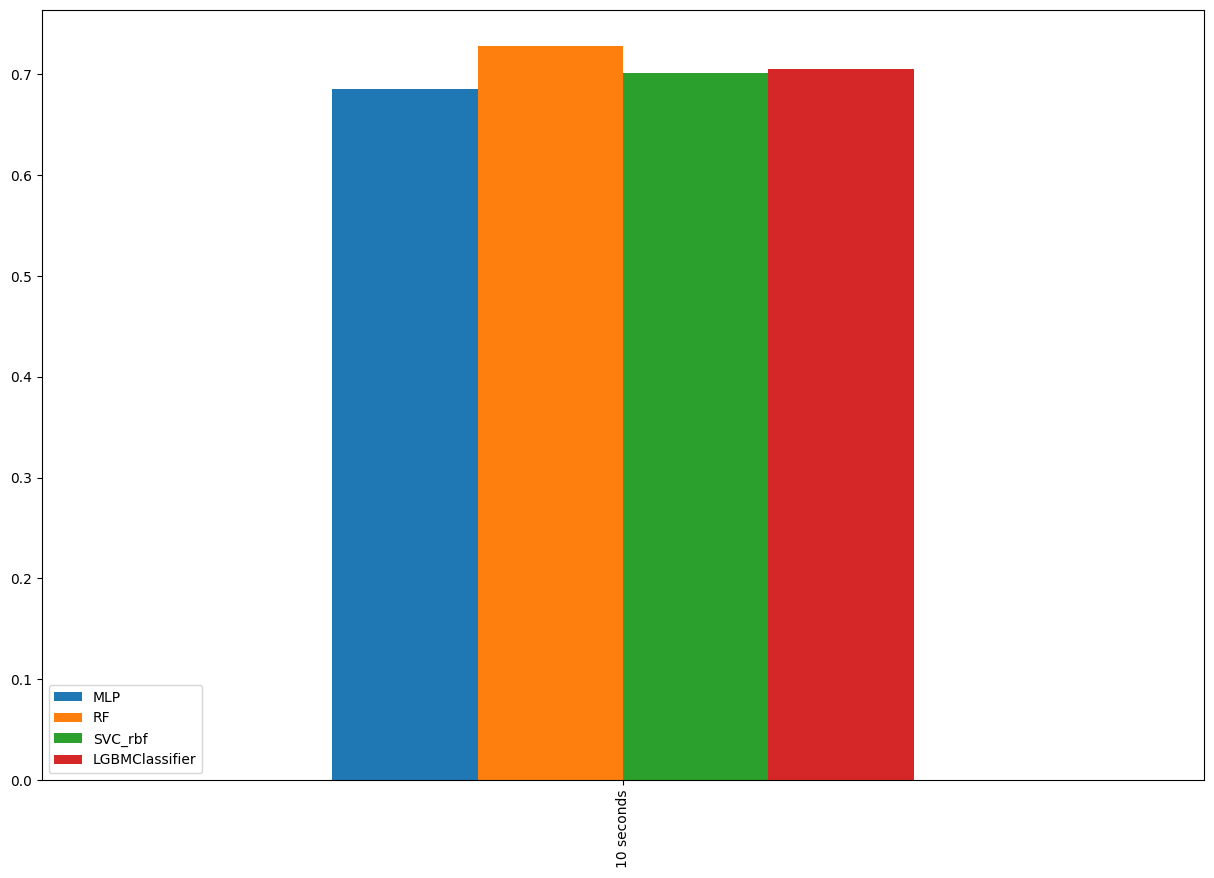

In [ ]:
dur_acc_df.plot(kind='bar', figsize=(15, 10))
plt.legend(loc='lower left')
plt.show()